In [1]:
import pandas as pd
from pathlib import Path
import re
from typing import Dict
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")
import matplotlib_inline
# get higher quality plots
matplotlib_inline.backend_inline.set_matplotlib_formats('retina')

In [2]:
DATA_DIR = Path("/data/grammar/coedit")

In [3]:
coedit = pd.read_parquet(DATA_DIR.joinpath("raw", "train.parquet"))

In [4]:
coedit.head()

,_id,task,src,tgt
0,1,gec,Remove all grammatical errors from this text: ...,"For example, countries with a lot of deserts c..."
1,2,gec,Improve the grammaticality: As the number of p...,"As the number of people grows, the need for a ..."
2,3,gec,Improve the grammaticality of this sentence: B...,Besides some technological determinists that a...
3,4,gec,Remove all grammatical errors from this text: ...,Safety is one of the crucial problems that man...
4,5,gec,Fix grammaticality in this sentence: On one ha...,"On the one hand, more and more viruses and hac..."


In [5]:
coedit.task.unique()

array(['gec', 'neutralize', 'simplification', 'paraphrase', 'coherence',
       'clarity'], dtype=object)

In [6]:
coedit.task.value_counts()

task
gec               19823
paraphrase        15370
simplification    11440
coherence         10616
neutralize        10570
clarity            1252
Name: count, dtype: int64

<Axes: title={'center': 'Distribution of Grammar Tasks'}, xlabel='Count', ylabel='Task'>

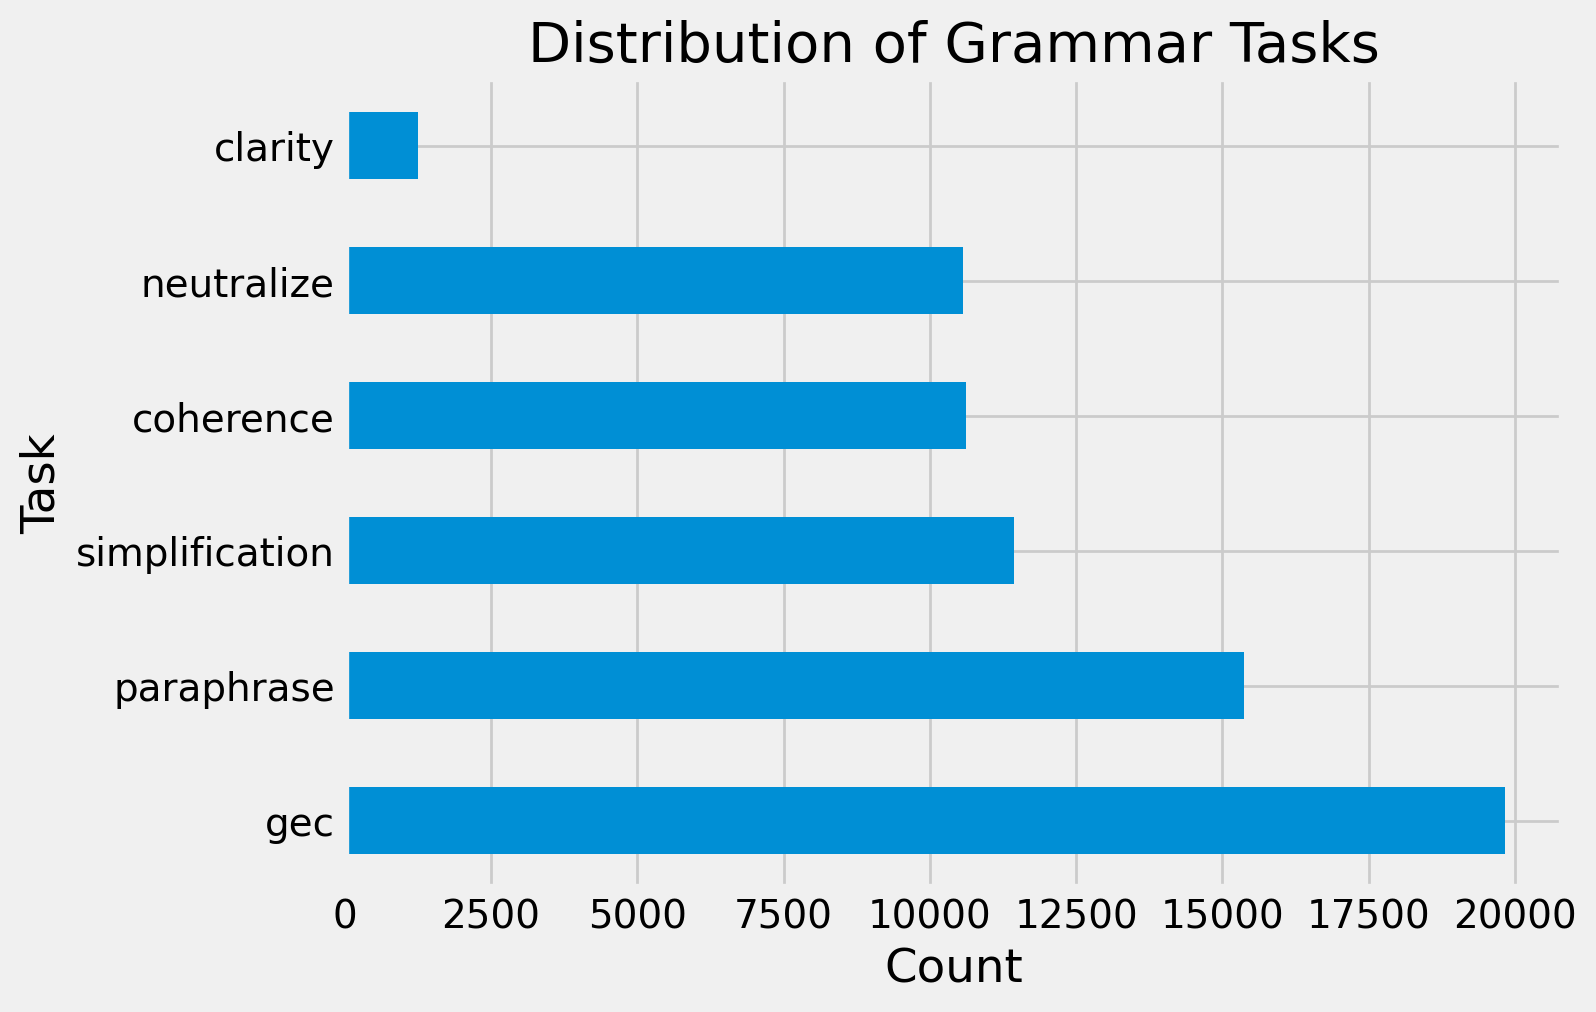

In [7]:
# plot the value counts of the tasks and make the labels horizontal
coedit.task.value_counts().plot(kind="barh", xlabel="Count",
                                ylabel="Task", 
                                title="Distribution of Grammar Tasks",
                                rot=0, figsize=(7, 5))

In [8]:
coedit.src.apply(lambda s: len(s)).max()

884

In [9]:
coedit.src.apply(lambda s: len(s)).mean()

127.42111740093527

In [10]:
prompts = coedit.src.str.extract(r"^(.*?):")

In [11]:
prompts.rename(columns={0: "prompt"}, inplace=True)

In [12]:
# concatenate the prompts to the dataframe
prompts = pd.concat([coedit["task"], prompts], axis=1)

In [13]:
# sample 5 from each task
prompts.groupby("task").sample(2)

,task,prompt
68428,clarity,Clarification
68722,clarity,Write a clarified version of the sentence
57718,coherence,Fix coherence in this sentence
66278,coherence,Make the text clearer
2470,gec,Fix disfluencies in the sentence
11538,gec,Improve the grammaticality
29079,neutralize,Remove POVs
20482,neutralize,Remove unsourced opinions from this text
52289,paraphrase,Rewrite this text
49880,paraphrase,Rewrite the sentence with different wording


In [14]:
coedit["prompts"] = coedit.src.str.extract(r"^(.*?):")

In [15]:
coedit["input_text"] = coedit.src.str.extract(r":(.+)")